# AirBnb - feature importance

## Key Steps for the Project
Following the CRISP-DM process.

1. Picking a dataset, as mentioned on the previous page.
2. Proposing at least three questions related to business or real-world applications of how the data could be used.
3. Creating a Jupyter Notebook, using any associated packages to:
    * Prepare data:
    * Gather necessary data to answer your questions
    * Handle categorical and missing data
    * Provide insight into the methods you chose and why you chose them
    * Analyze, Model, and Visualize
    * Provide a clear connection between your business questions and how the data answers them
4. Communicating business insights:
    * Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
    * Create a blog post to share your questions and insights with a non-technical audience

## Business Understanding

### Research questions
* Which are the most relevant characteristics of an accomodation related to the availability?
* How is the relation of the tourism appeal of the city and the renting characteristics?
* How does the geographical regions relates to the characteristics of the offered accomodation on AirBnb?

### Data Collection
The data which is used in this project is the AirBnb data from the following cities:
1. AustinAustin, Texas, United States
2. Boston, Massachusetts, United States
3. Chicago, Illinois, United States
4. Los Angeles, California, United States
5. Nashville, Tennessee, United States
6. New Orleans, Louisiana, United States
8. San Francisco, California, United States
9. Seattle, Washington, United States

The data was collected though this [link](http://insideairbnb.com/get-the-data.html).<br>

For each city the data collected are:
1. calendar
    * listing_id
    * date
    * available
    * price

2. listings
    * id
    * listing_url
    * scrape_id
    * last_scraped
    * name
    * summary
    * space
    * description
    * experiences_offered
    * neighborhood_overview
    * notes
    * transit
    * thumbnail_url
    * medium_url
    * picture_url
    * xl_picture_url
    * host_id
    * host_url
    * host_name
    * host_since
    * host_location
    * host_about
    * host_response_time
    * host_response_rate
    * host_acceptance_rate
    * host_is_superhost
    * host_thumbnail_url
    * host_picture_url
    * host_neighbourhood
    * host_listings_count
    * host_total_listings_count
    * host_verifications
    * host_has_profile_pic
    * host_identity_verified
    * street
    * neighbourhood
    * neighbourhood_cleansed
    * neighbourhood_group_cleansed
    * city
    * state
    * zipcode
    * market
    * smart_location
    * country_code
    * country
    * latitude
    * longitude
    * is_location_exact
    * property_type
    * room_type
    * accommodates
    * bathrooms
    * bedrooms
    * beds
    * bed_type
    * amenities
    * square_feet
    * price
    * weekly_price
    * monthly_price
    * security_deposit
    * cleaning_fee
    * guests_included
    * extra_people
    * minimum_nights
    * maximum_nights
    * calendar_updated
    * has_availability
    * availability_30
    * availability_60
    * availability_90
    * availability_365
    * calendar_last_scraped
    * number_of_reviews
    * first_review
    * last_review
    * review_scores_rating
    * review_scores_accuracy
    * review_scores_cleanliness
    * review_scores_checkin
    * review_scores_communication
    * review_scores_location
    * review_scores_value
    * requires_license
    * license
    * jurisdiction_names
    * instant_bookable
    * cancellation_policy
    * require_guest_profile_picture
    * require_guest_phone_verification
    * calculated_host_listings_count
    * reviews_per_month

3. reviews
    * listing_id
    * id
    * date
    * reviewer_id
    * reviewer_name
    * comments

To perform the analysis further information about the cities to be analysed was gathered from [this article](https://finance.yahoo.com/news/30-most-visited-cities-u-145000465.html).<br>

City|Foreign tourists in 2019|US Ranking of most visited cities
--| -- | -- 
Austin, Texas, United States|<200.000|>30
Boston, Massachusetts, United States|1.567.000|9
Chicago, Illinois, United States|1.491.000|10
Los Angeles, California, United States|4.645.000|3
Nashville, Tennessee, United States|<200.000|>30
New Orleans, Louisiana, United States|436.000|23
San Francisco, California, United States|3.308.000|5
Seattle, Washington, United States|844.000|14

The idea is to analyse the influence of the tourism appeal of each city on the AirBnb's customer behavior and on the availabilty rates of the offered accomodations.



## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import gzip
from io import BytesIO
import re
from decimal import Decimal

import seaborn as sns
import matplotlib as plt

## Toolkit functions

In [2]:
def remove_nonnumeric_chars(s):
    '''
    INPUT:
    s - numeric string with non-numeric charachters

    OUTPUT:
    np.float16 - numeric value before the dot
    '''
    return np.float64(Decimal(re.sub(r'[^\d.]', '', s)))

In [3]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    
    cat_df_out = pd.get_dummies(df[cat_cols], prefix=cat_cols, prefix_sep='_', dummy_na=dummy_na, drop_first=True)
    df_out     = cat_df_out.join(df.drop(cat_cols, axis=1))

    return df_out

In [4]:
def get_sequences(vector, split_val):
    ''''
    INPUT:
    vector - raw serie (pd.Series)
    split_val - reference str to split the series

    OUTPUT:
    median, mean, max, min values of the sequences found in the serie
    '''    
    sequences = ''.join([str(val) for val in vector]).split(split_val)
    sequences_count = [len(val) for val in sequences]
    sequences_cleansed = [val for val in sequences_count if val>0]

    if len(sequences_cleansed) > 0:
        return np.median(sequences_cleansed), np.mean(sequences_cleansed), np.max(sequences_cleansed), np.min(sequences_cleansed)
    else:
        return 0,0,0,0

## Data Understanding

### Load Data

#### calendar data

##### Load

In [5]:
np.float16('20.00')

20.0

In [6]:
city = 'austin'
calendar_path = f'datasets/raw/{city}/calendar.csv.gz'

with gzip.open(calendar_path,'r') as f:
    df_calendar = pd.read_csv(BytesIO(f.read()))

##### Check head

In [7]:
# show head of calendar dataframe
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1078,2021-12-11,f,$120.00,$120.00,1.0,1125.0
1,1078,2021-12-12,f,$95.00,$95.00,1.0,1125.0
2,1078,2021-12-13,f,$95.00,$95.00,1.0,1125.0
3,1078,2021-12-14,f,$95.00,$95.00,1.0,1125.0
4,1078,2021-12-15,f,$95.00,$95.00,1.0,1125.0


##### Check types

In [8]:
df_calendar.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4151151 entries, 0 to 4151150
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      4151151 non-null  int64  
 1   date            4151151 non-null  object 
 2   available       4151151 non-null  object 
 3   price           4151151 non-null  object 
 4   adjusted_price  4151151 non-null  object 
 5   minimum_nights  4151147 non-null  float64
 6   maximum_nights  4151147 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 221.7+ MB


##### Check NaN values

In [9]:
columns = df_calendar.columns
for col in columns:
    print(f'{col} : {df_calendar[col].isna().mean()}')

listing_id : 0.0
date : 0.0
available : 0.0
price : 0.0
adjusted_price : 0.0
minimum_nights : 9.635881710879705e-07
maximum_nights : 9.635881710879705e-07


Since there are proportionally just a few missing values, it is not a big deal to drop those rows

In [10]:
df_calendar.dropna(inplace=True)

##### Checking types

We need to clean the "price" and the "adjusted_price" columns to transform the numeric string into numeric values

In [11]:
# object to numeric transformation
toNumeric_columns =  ['price','adjusted_price']
for col in toNumeric_columns:
    df_calendar[col] = df_calendar[col].apply(remove_nonnumeric_chars)

# str to datetime transformation
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

##### Categorical Variables

In [12]:
cat_cols_lst = ['available']
df_calendar = create_dummy_df(df_calendar, cat_cols_lst, dummy_na=False)

##### Aggregating by accomodation

In [13]:
df_calendar_agg = df_calendar.groupby('listing_id').agg({'date':['min','max'],
                                                        'price':['min', 'max', 'mean'], 
                                                        'adjusted_price':['min', 'max', 'mean'], 
                                                        'minimum_nights':['min','max','mean'], 
                                                        'maximum_nights':['min','max'],
                                                        'available_t':'sum'
                                                        })

In [14]:
df_calendar_agg.head()

date             price                    adjusted_price  \
                  min        max    min    max        mean            min   
listing_id                                                                  
1078       2021-12-11 2022-12-10   95.0  120.0  102.191781           95.0   
2265       2021-12-11 2022-12-10  170.0  200.0  178.630137          170.0   
5245       2021-12-11 2022-12-10  100.0  150.0  114.383562          100.0   
5456       2021-12-11 2022-12-10   95.0  250.0  116.438356           95.0   
5769       2021-12-11 2022-12-10   39.0   41.0   39.682192           39.0   

                              minimum_nights             maximum_nights  \
              max        mean            min   max  mean            min   
listing_id                                                                
1078        120.0  102.191781            1.0   1.0   1.0         1125.0   
2265        200.0  178.630137            7.0   7.0   7.0          180.0   
5245        150.0  114.383562           30.0  30.0  30.0           90.0   
5456        250.0  116.438356            2.0   2.0   2.0           90.0   
5769         41.0   39.682192            1.0   1.0   1.0           14.0   

                   available_t  
               max         sum  
listing_id                      
1078        1125.0         0.0  
2265         180.0         0.0  
5245          90.0         0.0  
5456          90.0       345.0  
5769          14.0         0.0

Renaming aggregated columns

In [15]:
# concat agg column names
col_names = []
for cols in df_calendar_agg.columns:
    new_col = '_'.join(cols)
    col_names.append(new_col)


# rename columns
df_calendar_agg.columns = col_names

df_calendar_agg.head()

,date_min,date_max,price_min,price_max,price_mean,adjusted_price_min,adjusted_price_max,adjusted_price_mean,minimum_nights_min,minimum_nights_max,minimum_nights_mean,maximum_nights_min,maximum_nights_max,available_t_sum
listing_id,,,,,,,,,,,,,,
1078,2021-12-11,2022-12-10,95.0,120.0,102.191781,95.0,120.0,102.191781,1.0,1.0,1.0,1125.0,1125.0,0.0
2265,2021-12-11,2022-12-10,170.0,200.0,178.630137,170.0,200.0,178.630137,7.0,7.0,7.0,180.0,180.0,0.0
5245,2021-12-11,2022-12-10,100.0,150.0,114.383562,100.0,150.0,114.383562,30.0,30.0,30.0,90.0,90.0,0.0
5456,2021-12-11,2022-12-10,95.0,250.0,116.438356,95.0,250.0,116.438356,2.0,2.0,2.0,90.0,90.0,345.0
5769,2021-12-11,2022-12-10,39.0,41.0,39.682192,39.0,41.0,39.682192,1.0,1.0,1.0,14.0,14.0,0.0


##### Feature engineering

In [16]:
# number of days online
df_calendar_agg['online_days'] = (df_calendar_agg['date_max']-df_calendar_agg['date_min']).apply(lambda x: x.days)+1
# occupied days
df_calendar_agg['ocupied_days'] = df_calendar_agg['online_days'] - df_calendar_agg['available_t_sum']
# total revenue generated by the allocation
df_calendar_agg['revenue'] = df_calendar_agg['ocupied_days']*df_calendar_agg['price_mean']
# ocupation rate
df_calendar_agg['ocupation_rate'] = df_calendar_agg['ocupied_days'] / df_calendar_agg['online_days']
# geographical data
df_calendar_agg['city'] = city
# ocupation duration stats
ocupation_duration_stats = pd.DataFrame()

d = {'listing_id':[],
        'ocupation_duration_median':[],
        'ocupation_duration_mean':[],
        'ocupation_duration_max':[],
        'ocupation_duration_min':[]
        }
    
for listing_id in df_calendar_agg.index:

    vector = df_calendar.loc[df_calendar['listing_id']==listing_id]['available_t']
    median_val, mean_val, max_val, min_val = get_sequences(vector, '1')
    d['listing_id'].append(listing_id) 
    d['ocupation_duration_median'].append(median_val)
    d['ocupation_duration_mean'].append(mean_val)
    d['ocupation_duration_max'].append(max_val)
    d['ocupation_duration_min'].append(min_val)


ocupation_duration_stats = pd.DataFrame(d)
df_calendar_agg = df_calendar_agg.join(ocupation_duration_stats.set_index('listing_id'))   



In [17]:
ocupation_duration_stats.tail()

,listing_id,ocupation_duration_median,ocupation_duration_mean,ocupation_duration_max,ocupation_duration_min
11368,53760016,1.0,1.0,1,1
11369,53764066,32.0,32.0,32,32
11370,53767190,0.0,0.0,0,0
11371,53769566,6.5,56.5,300,2
11372,53770692,7.0,7.0,7,7


<AxesSubplot:xlabel='ocupation_duration_mean', ylabel='Count'>

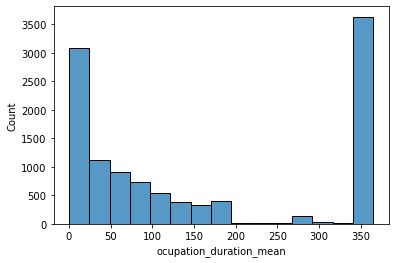

In [18]:
sns.histplot(x='ocupation_duration_mean', data=ocupation_duration_stats)

<AxesSubplot:xlabel='ocupation_duration_min', ylabel='Count'>

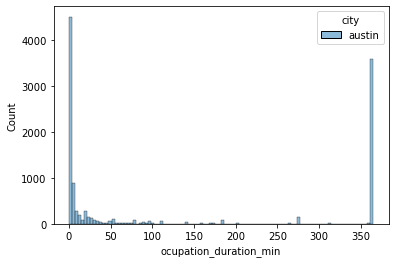

In [27]:
sns.histplot(x='ocupation_duration_mean', data=df_calendar_agg, hue='city', bins=100)

In [28]:
df_calendar_agg.shape

(11373, 23)

##### Ingesting Pipeline - Calendar

In [30]:
trusted_calendar_dataset = pd.DataFrame()

cities = ['austin', 'boston', 'chicago', 'los_angeles', 'nashville', 'new_orleans',  'new_york', 'san_francisco', 'seattle']

region = {'austin':'south', 
          'boston':'north_east', 
          'chicago':'north_east', 
          'los_angeles':'west', 
          'nashville':'south', 
          'new_orleans':'south',  
          'new_york':'north_east', 
          'san_francisco':'west', 
          'seattle':'west'}

for city in cities:
    # defining path to read data
    calendar_path = f'datasets/raw/{city}/calendar.csv.gz'

    # extracting data
    with gzip.open(calendar_path,'r') as f:
        df_calendar = pd.read_csv(BytesIO(f.read()))

    # dropping NaN values (not much missing values)
    df_calendar.dropna(inplace=True)
    
    # object to numeric transformation
    toNumeric_columns =  ['price','adjusted_price']
    for col in toNumeric_columns:
        df_calendar[col] = df_calendar[col].apply(remove_nonnumeric_chars)

    # str to datetime transformation
    df_calendar['date'] = pd.to_datetime(df_calendar['date'])

    # dealing with categorical values
    cat_cols_lst = ['available']
    df_calendar = create_dummy_df(df_calendar, cat_cols_lst, dummy_na=False)

    # Aggregating by listing_id
    df_calendar_agg = df_calendar.groupby('listing_id').agg({'date':['min','max'],
                                                        'price':['min', 'max', 'mean'], 
                                                        'adjusted_price':['min', 'max', 'mean'], 
                                                        'minimum_nights':['min','max','mean'], 
                                                        'maximum_nights':['min','max'],
                                                        'available_t':'sum'
                                                        })  
    
    # Renaming aggregated columns
    # concat agg column names
    col_names = []
    for cols in df_calendar_agg.columns:
        new_col = '_'.join(cols)
        col_names.append(new_col)

    # rename columns
    df_calendar_agg.columns = col_names


    # Feature engineering
    # number of days online
    df_calendar_agg['online_days'] = (df_calendar_agg['date_max']-df_calendar_agg['date_min']).apply(lambda x: x.days)+1
    # occupied days
    df_calendar_agg['ocupied_days'] = df_calendar_agg['online_days'] - df_calendar_agg['available_t_sum']
    # total revenue generated by the allocation
    df_calendar_agg['revenue'] = df_calendar_agg['ocupied_days'] * df_calendar_agg['price_mean']
    # ocupation rate
    df_calendar_agg['ocupation_rate'] = df_calendar_agg['ocupied_days'] / df_calendar_agg['online_days']
    # geographical data
    df_calendar_agg['city'] = city
    df_calendar_agg['region'] = region[city]

    d = {'listing_id':[],
        'ocupation_duration_median':[],
        'ocupation_duration_mean':[],
        'ocupation_duration_max':[],
        'ocupation_duration_min':[]
        }
    
    for listing_id in df_calendar_agg.index:

        vector = df_calendar.loc[df_calendar['listing_id']==listing_id]['available_t']
        median_val, mean_val, max_val, min_val = get_sequences(vector, '1')
        d['listing_id'].append(listing_id) 
        d['ocupation_duration_median'].append(median_val)
        d['ocupation_duration_mean'].append(mean_val)
        d['ocupation_duration_max'].append(max_val)
        d['ocupation_duration_min'].append(min_val)
    
    ocupation_duration_stats = pd.DataFrame(d)
    df_calendar_agg = df_calendar_agg.join(ocupation_duration_stats.set_index('listing_id'))   

    # concat data to the calendar dataset
    trusted_calendar_dataset = pd.concat([trusted_calendar_dataset, df_calendar_agg])

# loading data to the trusted directory
trusted_calendar_dataset.to_csv('datasets/trusted/calendar_dataset.csv')



    

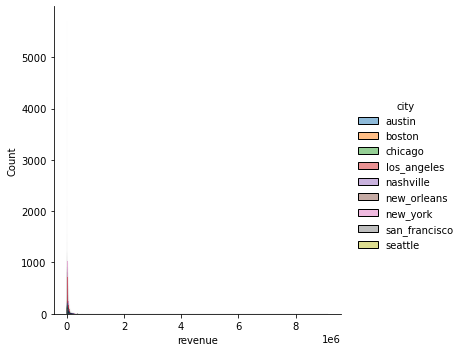

In [ ]:
sns.displot(x='revenue', data=trusted_calendar_dataset, hue='city')

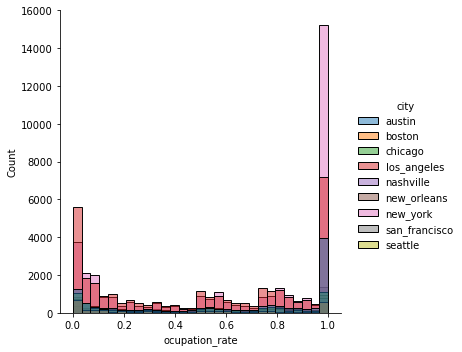

In [ ]:
sns.displot(x='ocupation_rate', data=trusted_calendar_dataset, hue='city')
# histplot(element='ocupation_rate', data=trusted_calendar_dataset, hue='city')

In [ ]:
sns.histplot(x='ocupation_duration_mean', data=df_calendar_agg, hue='city', bins=100)

<AxesSubplot:xlabel='online_days', ylabel='Count'>

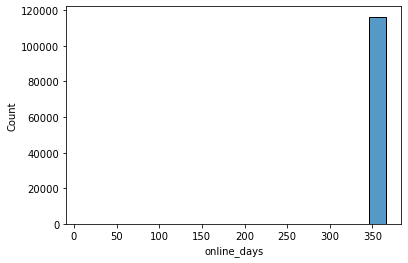

In [ ]:
sns.histplot(data=trusted_calendar_dataset['online_days'])

#### listings data

## Data Preparation

## Modelling